<a href="https://colab.research.google.com/github/Samikshha-K/EDA-DA/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSA

Fundamentals of TSA

In [1]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
zero_mean_series

array([ 0.91924612, -1.75462933,  1.22671143, -1.81683847, -0.71588447,
       -1.34436629, -2.77374623, -1.56387004,  0.62777592,  0.28987015,
       -0.09032459, -0.63608621,  1.14131874,  0.92942813, -0.69467097,
       -0.15212569, -0.1027615 ,  0.35199004, -0.67969238,  0.71614354,
       -0.2621407 , -1.03947152, -1.21833039, -0.38971764, -0.67239862,
        0.40919829, -0.85929912,  0.89705748,  0.04017738,  0.65418941,
       -1.7983376 , -0.39736999,  0.9059508 ,  1.74276706, -1.05301972,
        0.53375862, -0.52745269, -2.07953166, -1.06275721,  1.3413422 ,
       -1.07697716,  0.30422051, -1.5487225 ,  1.23341929,  0.13971834,
       -0.84481527,  0.13731656, -1.32191062,  1.18251954, -0.32201537])

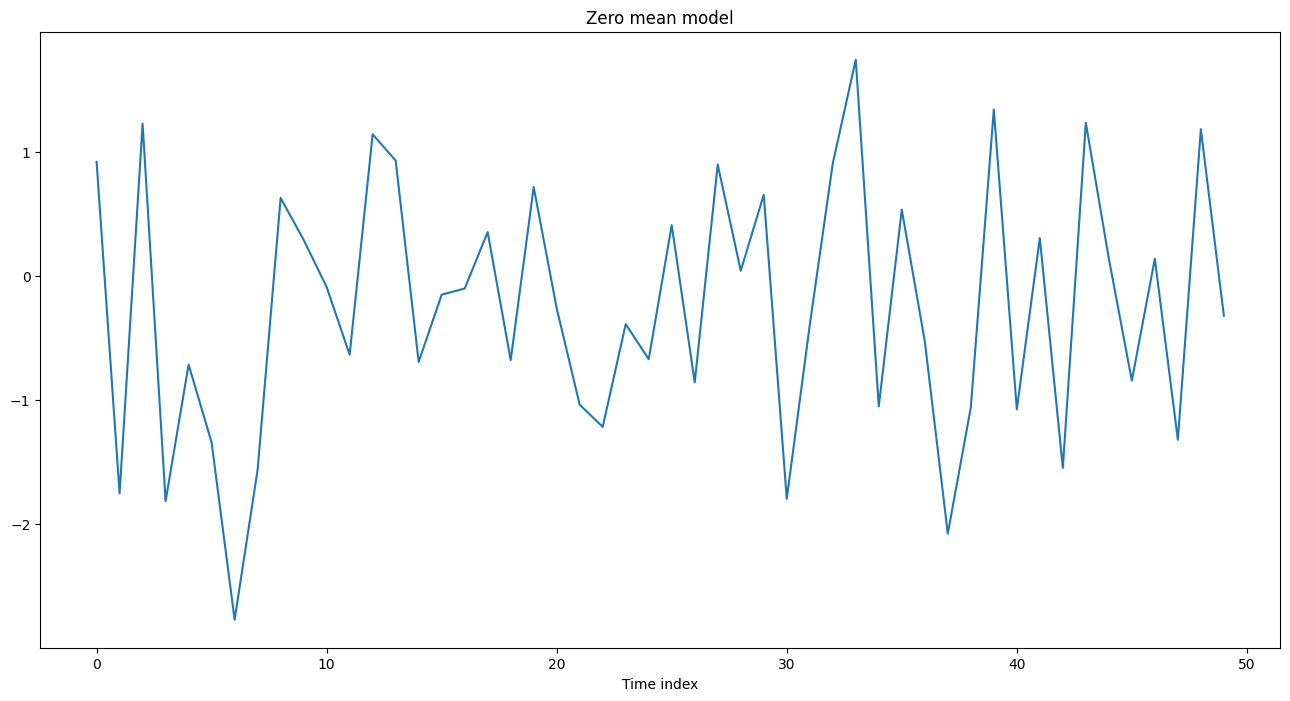

In [2]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.show()

In [3]:
random_walk = np.cumsum(zero_mean_series)
random_walk

array([  0.91924612,  -0.8353832 ,   0.39132823,  -1.42551024,
        -2.1413947 ,  -3.485761  ,  -6.25950723,  -7.82337727,
        -7.19560135,  -6.9057312 ,  -6.99605579,  -7.63214201,
        -6.49082327,  -5.56139513,  -6.25606611,  -6.4081918 ,
        -6.5109533 ,  -6.15896326,  -6.83865563,  -6.12251209,
        -6.3846528 ,  -7.42412432,  -8.64245471,  -9.03217234,
        -9.70457096,  -9.29537268, -10.1546718 ,  -9.25761433,
        -9.21743695,  -8.56324754, -10.36158514, -10.75895513,
        -9.85300433,  -8.11023727,  -9.16325699,  -8.62949837,
        -9.15695106, -11.23648272, -12.29923993, -10.95789773,
       -12.03487489, -11.73065438, -13.27937688, -12.04595758,
       -11.90623924, -12.75105451, -12.61373795, -13.93564857,
       -12.75312903, -13.0751444 ])

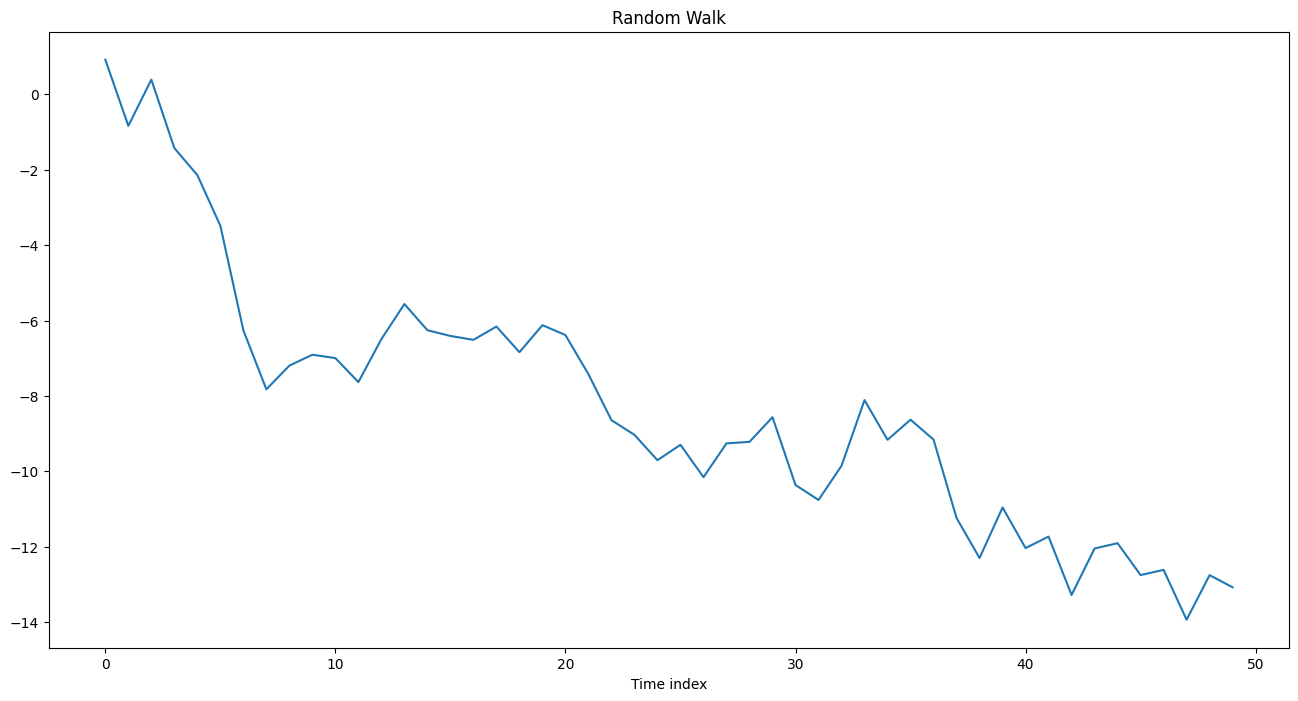

In [4]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()

TSA with open power system data

In [7]:
import pandas as pd
df_power=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Benefits.csv')
df_power.columns

Index(['rownames', 'stateur', 'statemb', 'state', 'age', 'tenure', 'joblost',
       'nwhite', 'school12', 'sex', 'bluecol', 'smsa', 'married', 'dkids',
       'dykids', 'yrdispl', 'rr', 'head', 'ui'],
      dtype='object')

Data cleaning

In [8]:
df_power.shape

(4877, 19)

In [9]:
print(df_power.tail(10))

      rownames  stateur  statemb  state  age  tenure             joblost  \
4867      4868     10.5      251     55   32      11          slack_work   
4868      4869     13.0      225     55   38      12  position_abolished   
4869      4870      9.4      136     93   28       1          slack_work   
4870      4871      4.0      250     41   25       6          slack_work   
4871      4872      8.6      125     59   21       2          slack_work   
4872      4873      7.4      168     33   35      12          slack_work   
4873      4874      7.0      189     74   39       5          slack_work   
4874      4875      8.0      168     74   59      13          slack_work   
4875      4876      6.3      191     41   33      11          slack_work   
4876      4877      9.3      188     94   27       2               other   

     nwhite school12     sex bluecol smsa married dkids dykids  yrdispl  \
4867     no       no    male     yes  yes     yes   yes     no       10   
4868     no  

In [10]:
df_power.dtypes

,0
rownames,int64
stateur,float64
statemb,int64
state,int64
age,int64
tenure,int64
joblost,object
nwhite,object
school12,object
sex,object


In [12]:
df_power = df_power.set_index('rownames')
df_power.tail(3)

,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
rownames,,,,,,,,,,,,,,,,,,
4875,8.0,168,74,59,13,slack_work,no,no,male,yes,yes,yes,yes,no,2,0.372428,yes,yes
4876,6.3,191,41,33,11,slack_work,no,no,male,yes,yes,yes,yes,yes,3,0.500000,yes,no
4877,9.3,188,94,27,2,other,no,no,male,yes,yes,yes,yes,yes,7,0.495413,yes,yes


In [13]:
df_power.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877],
      dtype='int64', name='rownames', length=4877)

In [14]:
df_power.sample(5, random_state=0)

,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
rownames,,,,,,,,,,,,,,,,,,
1663,8.0,224,23,35,2,slack_work,no,no,male,yes,no,yes,yes,no,4,0.520000,yes,no
3639,11.2,197,34,37,18,other,no,yes,male,yes,yes,yes,yes,no,3,0.231818,yes,yes
3711,5.4,200,83,42,5,slack_work,no,no,male,yes,no,yes,no,no,9,0.385514,yes,yes
1655,5.5,150,43,42,22,other,no,no,female,yes,no,yes,no,no,8,0.586735,no,yes
3726,5.7,175,59,37,7,other,yes,no,female,yes,no,no,no,no,5,0.500000,yes,yes


Visualizing time series

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

<Axes: xlabel='rownames'>

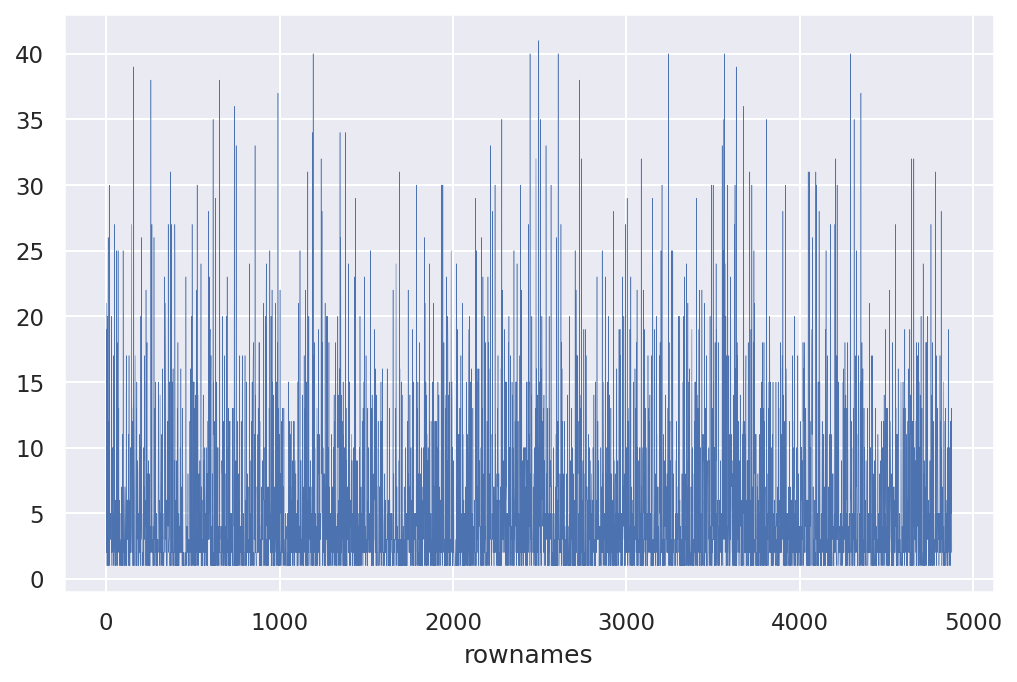

In [17]:
df_power['tenure'].plot(linewidth=0.25)

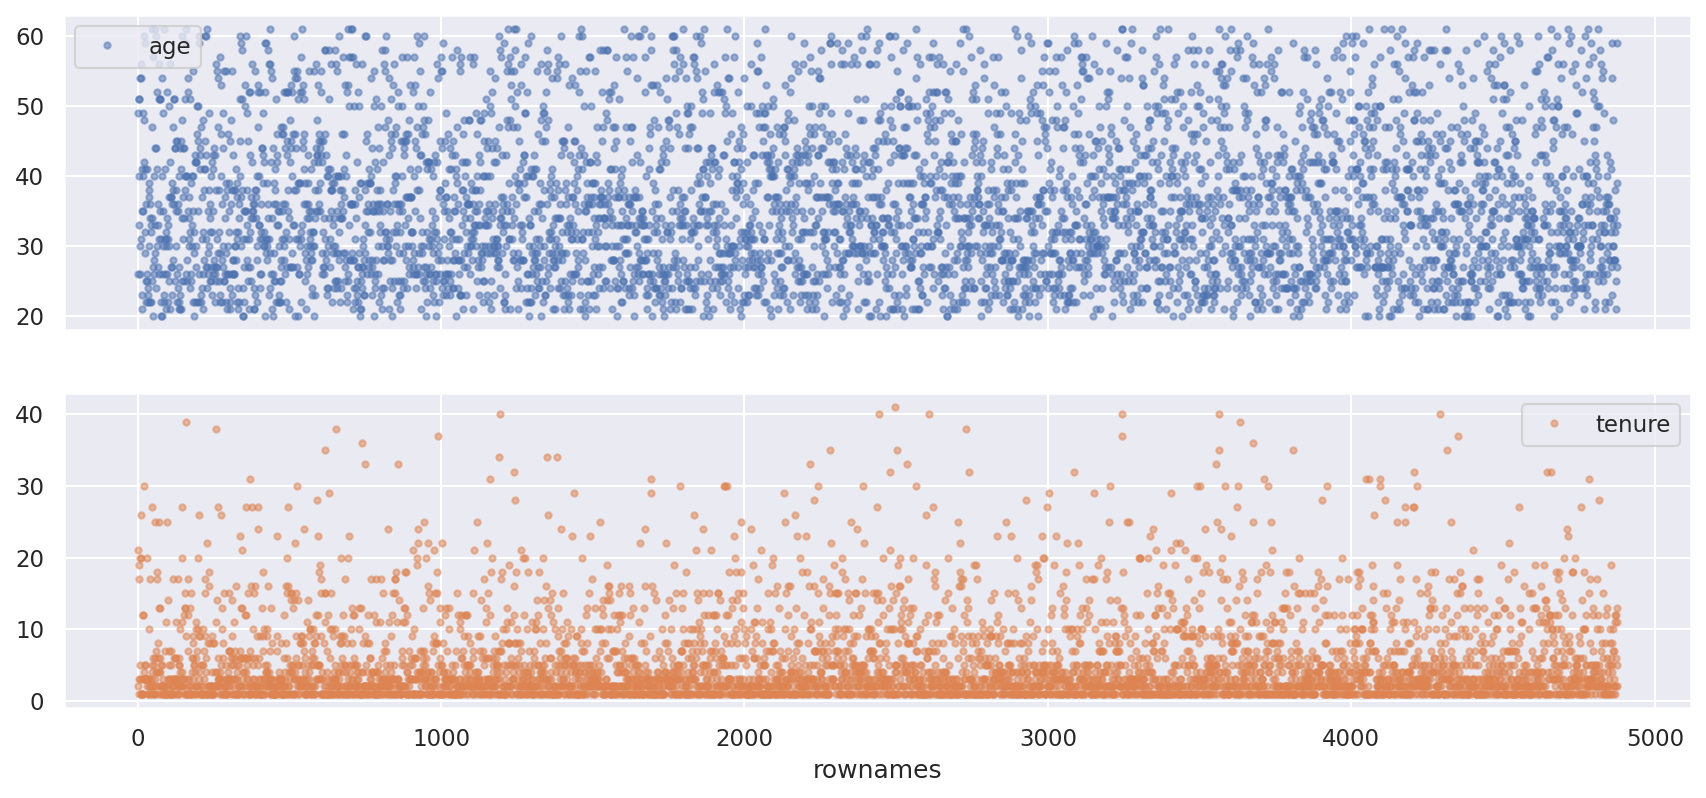

In [18]:
cols_to_plot = ['age','tenure']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)